In [1]:
# license: GPL v3
# authors: Sylwester Arabas, Michael Olesik, Piotr Bartman
# copyright: Jagiellonian University
# based on Fig. 1 from Arabas & Farhat 2020 (https://doi.org/10.1016/j.cam.2019.05.023)

In [2]:
%run _demo_common.ipynb

In [3]:
from PyMPDATA_examples.Arabas_and_Farhat_2020.simulation import Simulation
from PyMPDATA_examples.Arabas_and_Farhat_2020.setup1_european_corridor import Settings
from PyMPDATA_examples.utils.show_plot import show_plot
from matplotlib import pyplot
import numpy as np

In [4]:
settings = Settings()
simulation = Simulation(settings)

In [5]:
S = simulation.S
psi_T = simulation.terminal_value()
psi_0 = simulation.run(n_iters=2)
psi_a = settings.analytical_solution(S)

<IPython.core.display.Javascript object>


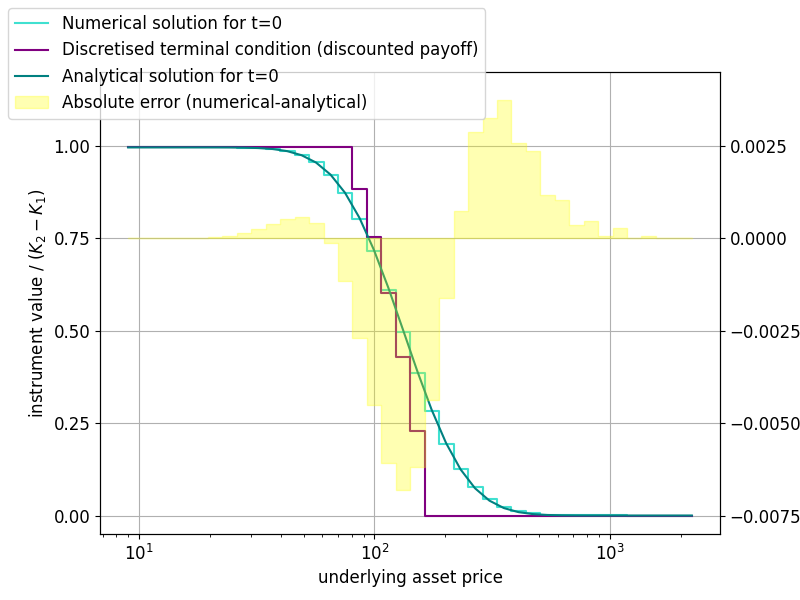

In [6]:
fig, ax1 = pyplot.subplots()
yscl = 1 / (settings.K2 - settings.K1)
ax2 = pyplot.twinx()
ax2.fill_between(S, yscl*(psi_0-psi_a), step="mid", label='Absolute error (numerical-analytical)', alpha=.3, color='yellow')
ax2.set_ylabel("absolute error / ($K_2-K_1$)")
ax1.step(S, yscl*psi_0, where='mid', label='Numerical solution for t=0', color=colors[2])
ax1.step(S, yscl*psi_T, where='mid', label="Discretised terminal condition (discounted payoff)", color=colors[0])
ax1.plot(S, yscl*psi_a, label='Analytical solution for t=0', color=colors[1])
ax1.set_xscale("log")
ax1.grid()
ax1.set_xlabel("underlying asset price")
ax1.set_ylabel("instrument value / ($K_2-K_1$)")
ax1.set_ylim((-.05, 1.2))
ax1.set_yticks(np.arange(0, 1.25, 0.25))
ax2.set_ylim((-.008,.0045))
ax2.set_yticks(np.arange(-.0075, .005, .0025))
fig.legend(loc='upper left')
show_plot()

In [7]:
scl = settings.K2 - settings.K1
np.testing.assert_almost_equal(np.amax(psi_0 / scl), 1, decimal=2)

In [8]:
scl = settings.K2 - settings.K1
np.testing.assert_almost_equal(np.amin(psi_0 / scl), 0, decimal=14)

In [9]:
abserr = psi_0 - psi_a
maxabserr = np.amax(np.abs(abserr))
assert np.abs(abserr[0]) < .0001 * maxabserr
assert np.abs(abserr[-1]) < .001 * maxabserr
assert maxabserr < .75